# Development Phase 1 : Stride Case Study

## Onboard to the data

### Installation packages

In [2]:
# !pip install tabulate
# !pip install plotly
# conda install nbformat
#python version 3.9
# !pip install gitly

### Importing Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objects as go
import os
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

### Reading Dataframe

In [4]:
import os
import pandas as pd
current_dir = os.getcwd()
#defining current directory so that any developer can run the full notebook with any File not found error
dataset_dir = os.path.join(current_dir, '..', '..', 'Dataset')
file_path = os.path.join(dataset_dir, 'stride.csv')
Stridedf = pd.read_csv(file_path)
Stridedf


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Understanding the column values type, isNull and count.

In [5]:
Stridedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Findings:
1. Total number of rows : 10999
2. No null values
3. Data types are properly defined to with the appropriate datatype.

## EDA (Exploratory Data Analysis)

In [6]:
def describe_columns_by_type(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64'])
    categorical_columns = df.select_dtypes(include='object')
    numerical_description = numerical_columns.describe()
    categorical_description = categorical_columns.describe()
    result = {
        'Numerical Columns': numerical_description,
        'Categorical Columns': categorical_description
    }
    return result

In [7]:
descriptions = describe_columns_by_type(Stridedf)
descriptions['Numerical Columns']

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
descriptions['Categorical Columns']

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Findings:

1. The column Reached.on.Time_Y.N contains boolean or binary values.

2. The distribution of columns Customer_care_calls, Customer_rating, and Prior_purchases are relatively symmetrical, as indicated by the minimal difference between their mean and median values.

3. The columns Discount_offered and Cost_of_the_Product display right-skewed distributions, with elongated right tails.

In [9]:
def count_categories_from_column(df):
    categorical_columns = df.select_dtypes(include='object').columns
    value_counts_dict = {}
    for col in categorical_columns:
        value_counts_dict[col] = df[col].value_counts()
    return value_counts_dict

In [10]:
category_counts = count_categories_from_column(Stridedf)
for col, value_counts in category_counts.items():
    print(f"Value counts for column '{col}':")
    print(tabulate(value_counts.reset_index(), headers=["Category", "Count"], tablefmt="grid"))
    print()

Value counts for column 'Warehouse_block':
+----+------------+---------+
|    | Category   |   Count |
+====+============+=========+
|  0 | F          |    3666 |
+----+------------+---------+
|  1 | D          |    1834 |
+----+------------+---------+
|  2 | A          |    1833 |
+----+------------+---------+
|  3 | B          |    1833 |
+----+------------+---------+
|  4 | C          |    1833 |
+----+------------+---------+

Value counts for column 'Mode_of_Shipment':
+----+------------+---------+
|    | Category   |   Count |
+====+============+=========+
|  0 | Ship       |    7462 |
+----+------------+---------+
|  1 | Flight     |    1777 |
+----+------------+---------+
|  2 | Road       |    1760 |
+----+------------+---------+

Value counts for column 'Product_importance':
+----+------------+---------+
|    | Category   |   Count |
+====+============+=========+
|  0 | low        |    5297 |
+----+------------+---------+
|  1 | medium     |    4754 |
+----+------------+------

## Univariate Analysis
We know that univariate analysis can only be done with one variable, but here we are trying to hue the arrival column with univariate variables to understand the distribution of data. but still we are only focusing on single variable/column here.

In [11]:
Stridedf_ua = Stridedf.copy()
Stridedf_ua.drop("ID", axis=1, inplace=True)
Stridedf_ua

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [12]:
def visualize_numeric_and_categorical(df):
    # Set color theme to purple for all graphs, because we need all colors for our project to be purple which looks standard and professional.
    purple_palette = px.colors.sequential.Agsunset
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include='object').columns
    # Visualize numerical columns using Dist plots
    for col in numerical_columns:
        fig = px.histogram(df, x=col, color='Reached.on.Time_Y.N', color_discrete_sequence=purple_palette)
        fig.update_layout(title=f"Dist Plot for {col}", xaxis_title=col, yaxis_title="Density")
        fig.show()
    # Visualize categorical columns using count plots
    for col in categorical_columns:
        fig = px.histogram(df, x=col, color='Reached.on.Time_Y.N', color_discrete_sequence=purple_palette)
        fig.update_layout(title=f"Count Plot for {col}", xaxis_title=col, yaxis_title="Count")
        fig.show()

In [13]:
visualize_numeric_and_categorical(Stridedf_ua)

Findings:

*Numerical Columns
1. As we expected when looking at the displot, the Prior_purchases and Discount_offered columns have a minor skewness that may call for some data revisions in the future. 

2. It appears that the cost_of_the_product column follows a distribution that is almost normal. 

3. Customer ratings and customer care calls have an equal distribution. A u-shaped uncertain distribution, for the weigh_in_gms column, can be seen. 

4. We don't have to pay too much attention to the distribution shape of time columns because they are binary.

*Categorical Columns
1. Delivery times for warehouse_block with category F are most delayed.
2. Deliveries for shipments made by ships run late.
3. Delivery delays are common for products_importance with low and medium classifications.

## Bivariate Analysis : Focusing on Correlations

In [14]:
Stridedf_ua

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [15]:
correlation_matrix = Stridedf_ua.corr()

# Plotting the correlation matrix as a heatmap using Plotly, trying to use new libraries as part of visualization exercies
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='dense'))
fig.update_layout(title="Correlation Matrix Heatmap", width=800, height=800)
fig.show()

Findings:

1. It shows a significant positive association with Discount_offered.

2. Weakly positive correlations exist between the target variable, "Reached.on.Time_Y.N," and customer_care_calls, customer ratings, ost_of_the_product, and prior_purchases.

3. On the other hand, weight_in_gms has a rather significant negative association.

### Bivariate analysis between significant correlation with Arrival time and some important columns

#### Unique Customers, Mode of shipment and Arrival time count (Y vs N)

In [16]:
unique_customers_count = Stridedf.groupby('Mode_of_Shipment').agg({'ID': 'nunique'}).reset_index()
pivot_table = Stridedf.pivot_table(index='Mode_of_Shipment', columns='Reached.on.Time_Y.N', values='ID', aggfunc='count', fill_value=0)
pivot_table.reset_index(inplace=True)
unique_customers_count = pd.merge(unique_customers_count, pivot_table, on='Mode_of_Shipment', how='left')
unique_customers_count.rename(columns={1: 'Not_reached_on_time', 0: 'Reached_on_time', 'ID':'<-Total Count'}, inplace=True)
unique_customers_count

,Mode_of_Shipment,<-Total Count,Reached_on_time,Not_reached_on_time
0,Flight,1777,708,1069
1,Road,1760,725,1035
2,Ship,7462,3003,4459


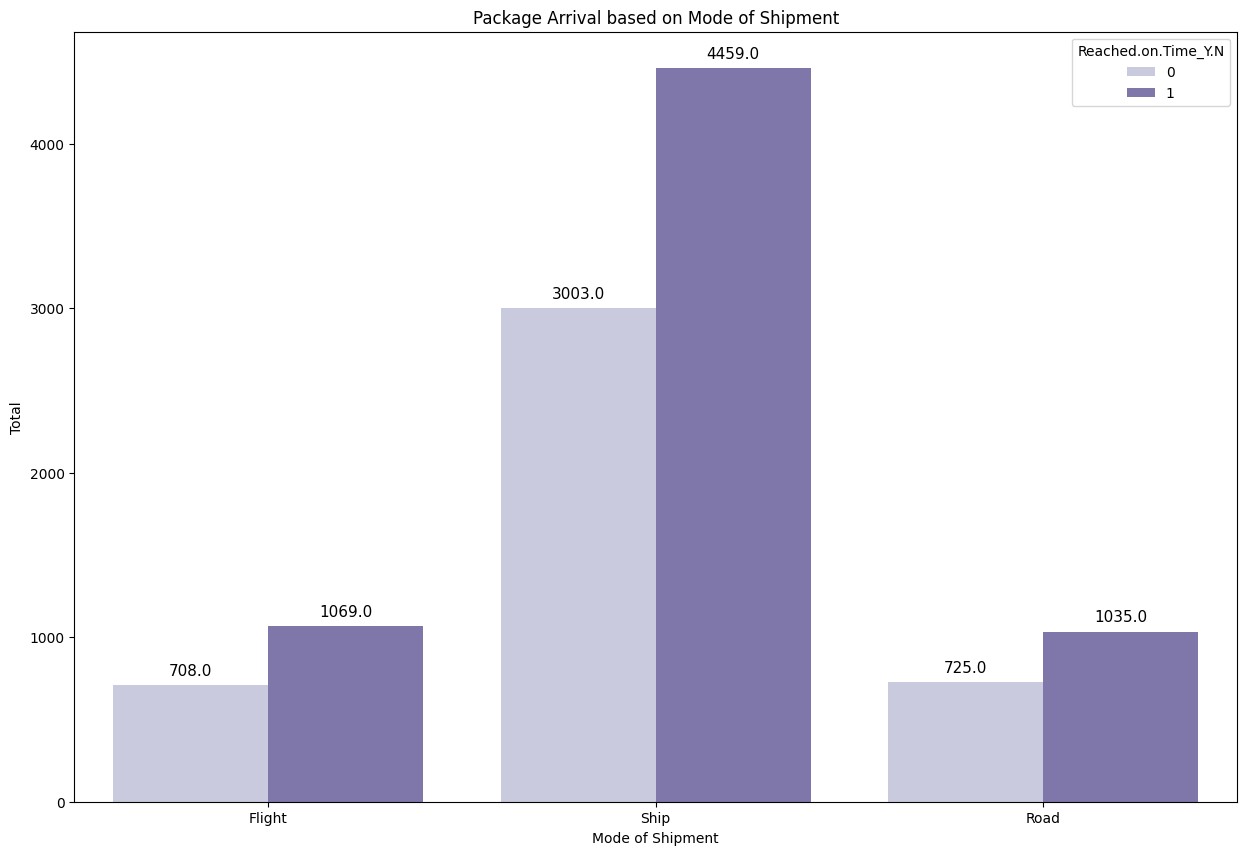

In [17]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=Stridedf, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', palette='Purples')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Mode of Shipment")
plt.ylabel("Total")
plt.title("Package Arrival based on Mode of Shipment")
plt.show()

Findings:
1. Highest Delivery fails on and arrived on Shop as mode of shopment
2. On the other hand Flight, and Road mode of shipment have similar kind of ups and downs in arrival time. 

#### Product_importance and Arrival time count (Y vs N)

In [18]:
Product_importance_c = Stridedf.groupby('Product_importance').agg({'ID': 'nunique'}).reset_index()
pivot_table = Stridedf.pivot_table(index='Product_importance', columns='Reached.on.Time_Y.N', values='ID', aggfunc='count', fill_value=0)
pivot_table.reset_index(inplace=True)
Product_importance_c = pd.merge(Product_importance_c, pivot_table, on='Product_importance', how='left')
Product_importance_c.rename(columns={1: 'Not_reached_on_time', 0: 'Reached_on_time', 'ID':'<-Total Count'}, inplace=True)
Product_importance_c

,Product_importance,<-Total Count,Reached_on_time,Not_reached_on_time
0,high,948,332,616
1,low,5297,2157,3140
2,medium,4754,1947,2807


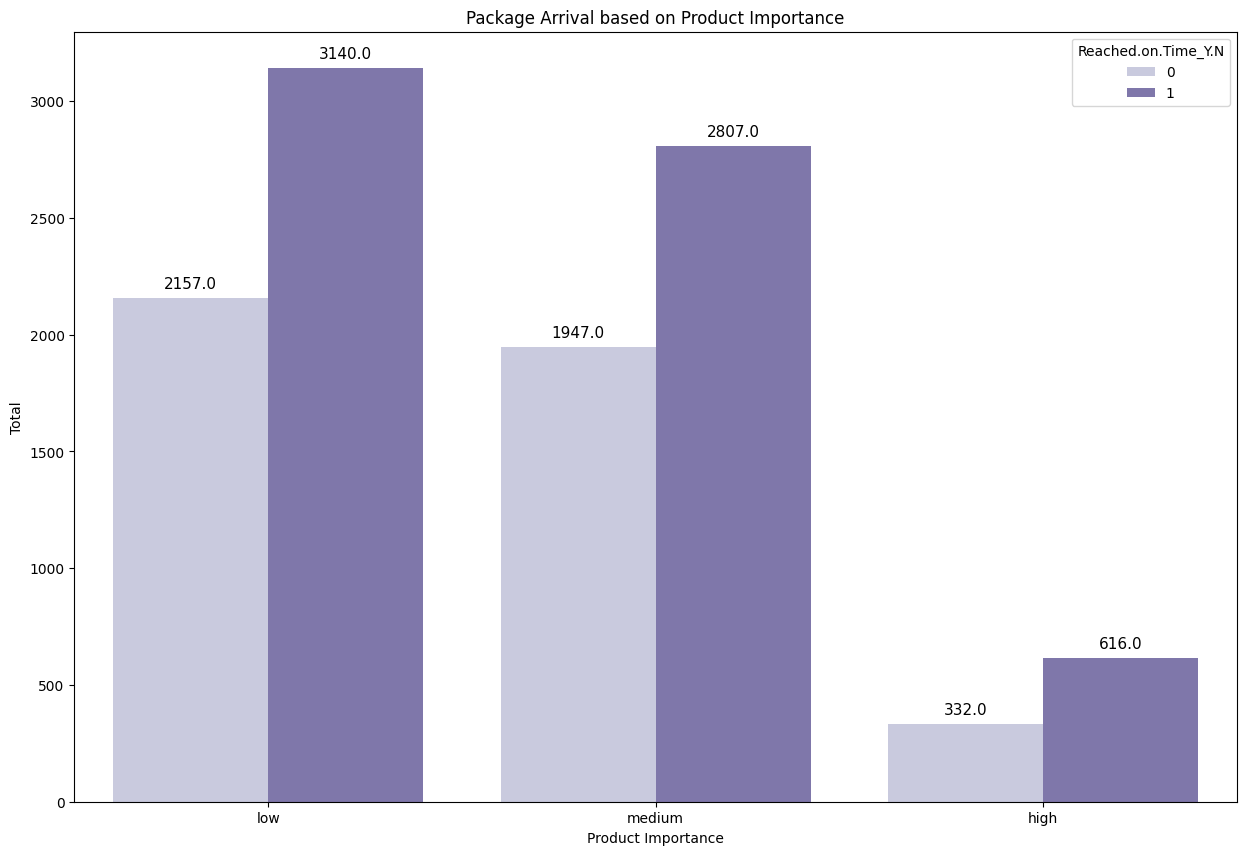

In [19]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(data=Stridedf, x='Product_importance', hue='Reached.on.Time_Y.N', palette='Purples')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Product Importance")
plt.ylabel("Total")
plt.title("Package Arrival based on Product Importance")
plt.show()

Findings:

1. High Product Importance: Among 948 products in the "high" importance category, 332 were delivered on time, while 616 were not delivered on time.

2. Low Product Importance: Out of 5297 products in the "low" importance category, 2157 were delivered on time, but 3140 were not delivered on time.

3. Medium Product Importance: Among 4754 products in the "medium" importance category, 1947 were delivered on time, and 2807 were not delivered on time.


In short it says that the data suggests a need for improvement in timely deliveries for products across all importance categories, particularly for high and low importance products.

#### Warehouse_block and Arrival time count (Y vs N)

In [20]:
pivot_table_warehouse = Stridedf.pivot_table(index='Warehouse_block', columns='Reached.on.Time_Y.N', values='ID', aggfunc='count', fill_value=0)
pivot_table_warehouse.reset_index(inplace=True)
Warehouse_block_c = pd.merge(pivot_table_warehouse, pivot_table_warehouse, on='Warehouse_block', how='left')
Warehouse_block_c.rename(columns={1: 'Reached_on_time_Y', 0: 'Not_reached_on_time', 'ID':'<-Total Count'}, inplace=True)
Warehouse_block_c

Reached.on.Time_Y.N,Warehouse_block,0_x,1_x,0_y,1_y
0,A,758,1075,758,1075
1,B,729,1104,729,1104
2,C,739,1094,739,1094
3,D,738,1096,738,1096
4,F,1472,2194,1472,2194


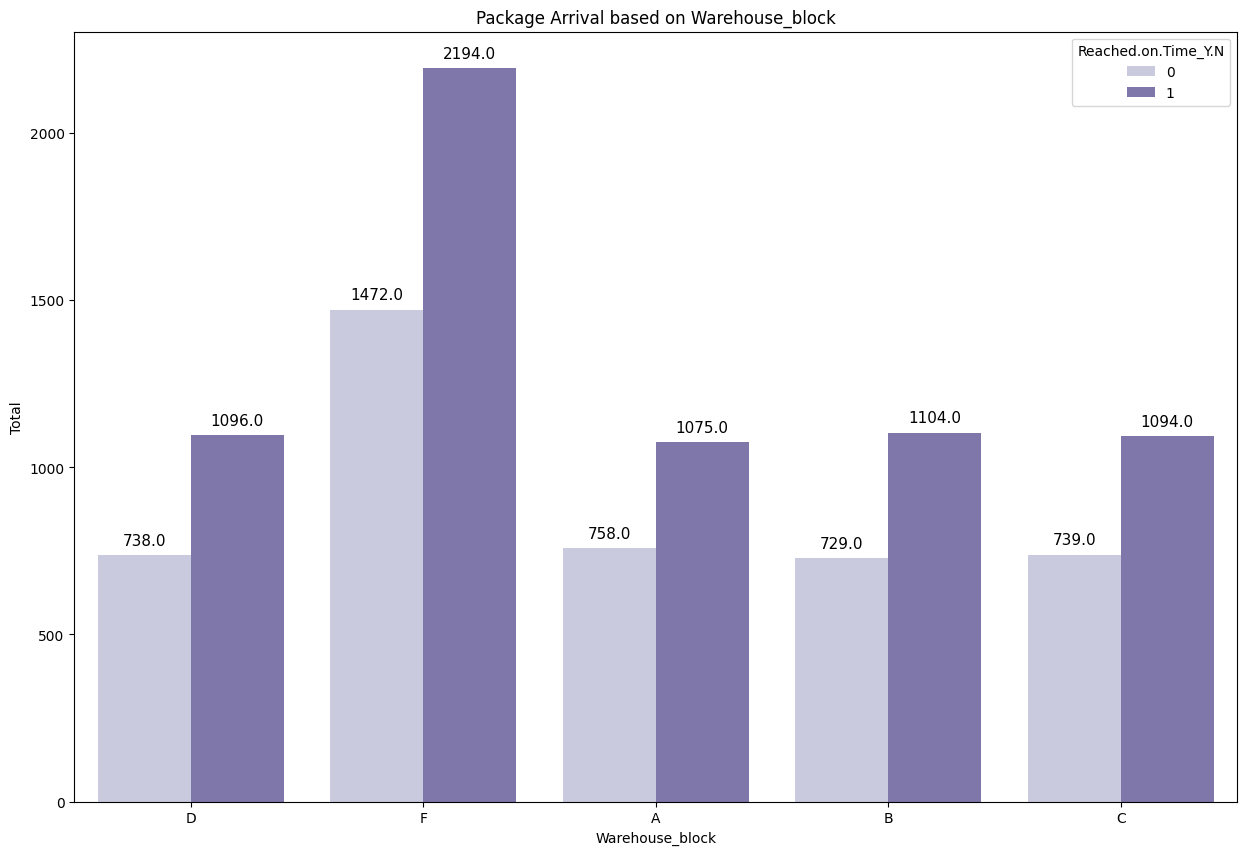

In [21]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(data=Stridedf, x='Warehouse_block', hue='Reached.on.Time_Y.N', palette='Purples')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Warehouse_block")
plt.ylabel("Total")
plt.title("Package Arrival based on Warehouse_block")
plt.show()

Findings

1. Warehouse Block F has the highest total count of products (3666) but also the highest number of products not delivered on time (1472).
2. Warehouse Block B shows a better performance with 1104 products delivered on time out of a total of 1833 products.
3. Across all blocks, the count of products delivered on time ("Reached_on_time_Y") is generally higher than the count of products not delivered on time ("Not_reached_on_time").

#### Weight_in_gms are sorted in bins. eg. 1000gm to 2000gm is wcat1 bin

In [22]:
weight_bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
weight_labels = ['wcat1', 'wcat2', 'wcat3', 'wcat4', 'wcat5', 'wcat6', 'wcat7']
Stridedf['Weight_Category'] = pd.cut(Stridedf['Weight_in_gms'], bins=weight_bins, labels=weight_labels, right=False)
weight_in_gms_c = Stridedf['Weight_Category'].value_counts().reset_index()
weight_in_gms_c.rename(columns={'index': 'Weight_Category', 'Weight_Category': 'Count'}, inplace=True)
weight_in_gms_c

,Weight_Category,Count
0,wcat1,3241
1,wcat4,3074
2,wcat5,2883
3,wcat2,903
4,wcat3,887
5,wcat6,6
6,wcat7,5


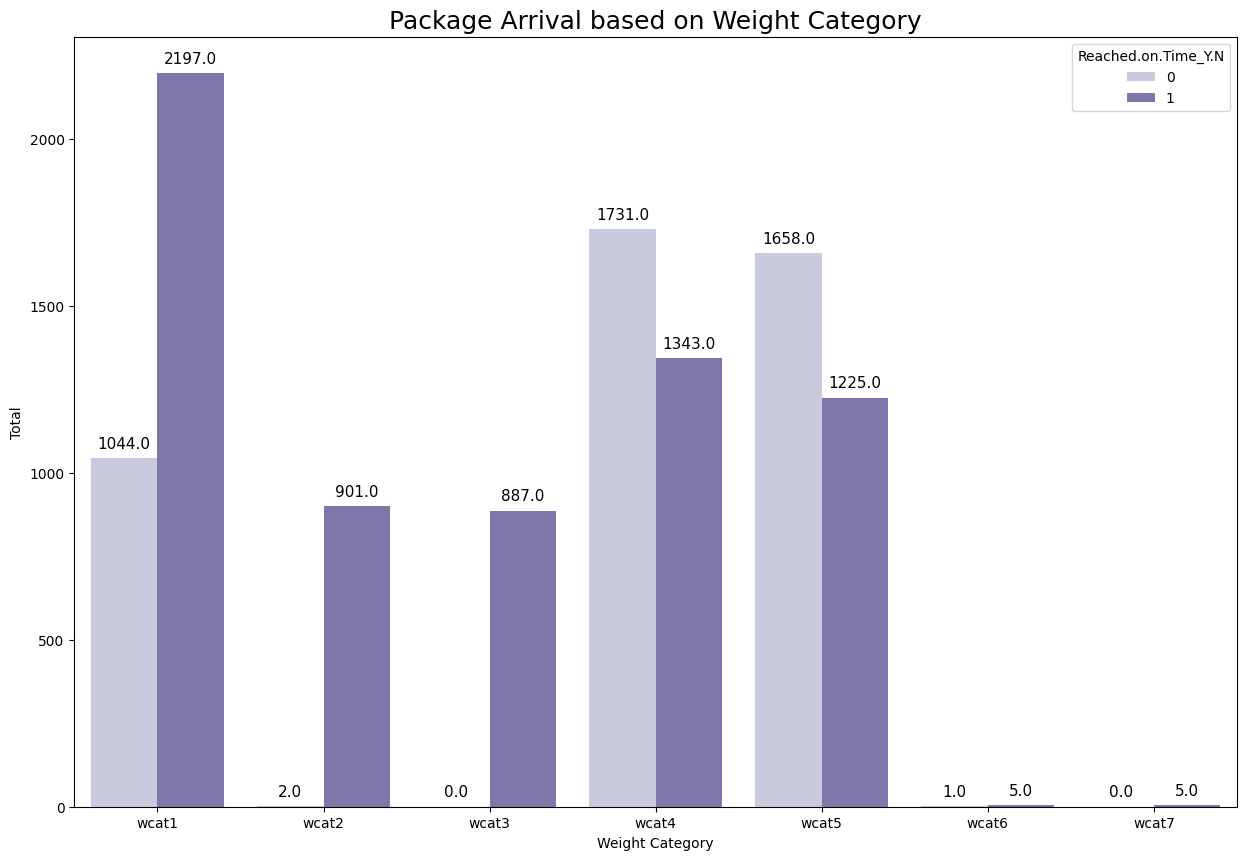

In [23]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=Stridedf, x='Weight_Category', hue='Reached.on.Time_Y.N', palette='Purples')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Weight Category")
plt.ylabel("Total")
plt.title("Package Arrival based on Weight Category", fontsize=18)
plt.show()

Findings :

1. Most products fall into the "wcat1" category (3241 products), with weights between 1000 and 2000 grams.
2. The "wcat4" category has a significant number of products (3074) in the weight range of 3000 to 4000 grams.
3. Similarly, the "wcat5" category contains a substantial count of products (2883) with weights ranging from 4000 to 5000 grams.
4. The "wcat2" and "wcat3" categories have fewer products, with counts of 903 and 887, respectively, representing weights between 2000 and 3000 grams.
5. The "wcat6" and "wcat7" categories have the fewest products, with only 6 and 5 products, respectively, indicating a scarcity of products in the weight ranges of 6000 to 7000 grams and 7000 to 8000 grams.

#### Discount_offered are sorted in bins. eg. 0 to 10 is dcat1 bin

In [24]:
discount_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
discount_labels = ['dcat1', 'dcat2', 'dcat3', 'dcat4', 'dcat5', 'dcat6', 'dcat7', 'dcat8', 'dcat9', 'dcat10']
Stridedf['Discount_Category'] = pd.cut(Stridedf['Discount_offered'], bins=discount_bins, labels=discount_labels, right=False)
discount_offered_c = Stridedf['Discount_Category'].value_counts().reset_index()
discount_offered_c.rename(columns={'index': 'Discount_Category', 'Discount_Category': 'Count'}, inplace=True)
discount_offered_c

,Discount_Category,Count
0,dcat1,7492
1,dcat2,1298
2,dcat5,507
3,dcat6,486
4,dcat3,465
5,dcat4,464
6,dcat7,287
7,dcat8,0
8,dcat9,0
9,dcat10,0


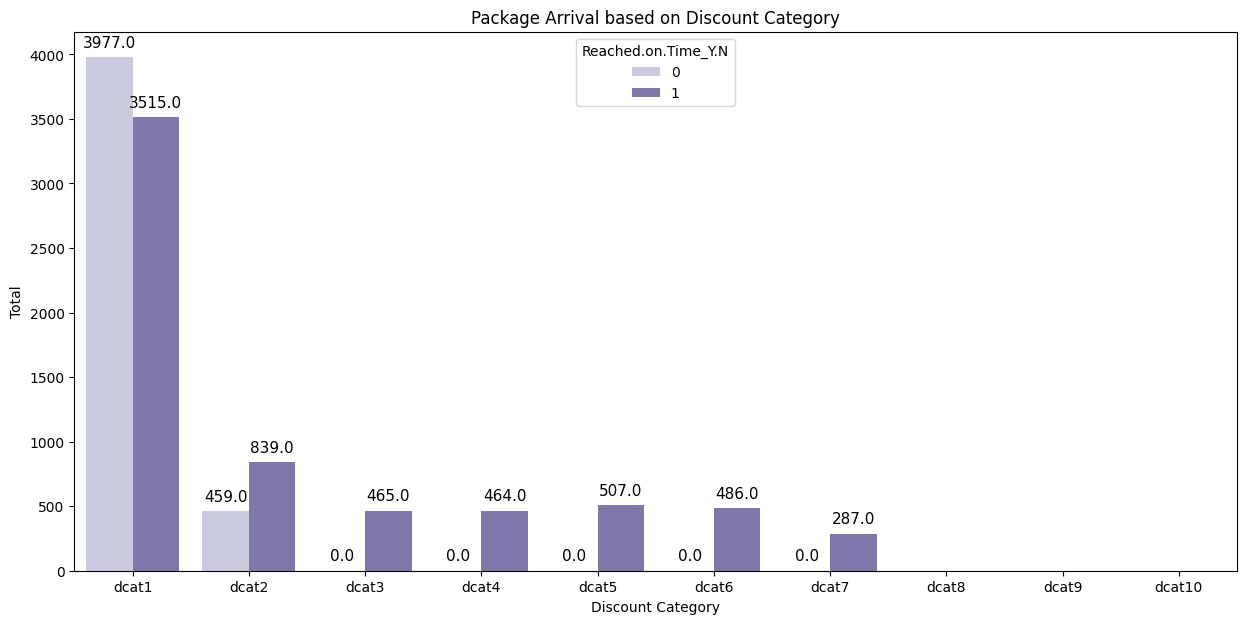

In [25]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=Stridedf, x='Discount_Category', hue='Reached.on.Time_Y.N', palette='Purples')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Discount Category")
plt.ylabel("Total")
plt.title("Package Arrival based on Discount Category")
plt.show()

Findings:

1. The majority of products are in the "dcat1" category, with a count of 7492, indicating that this is the most common discount category.
2. "dcat2" follows with 1298 products, representing a smaller count than "dcat1" but still relatively significant.
3. Categories "dcat5," "dcat6," "dcat3," and "dcat4" have counts ranging from 507 to 465, indicating a moderate presence of products in these discount categories.
4. "dcat7" contains 287 products, representing a lower count compared to the earlier categories.

"dcat8," "dcat9," and "dcat10" have no products. might be they will add it in future, indicating that there are currently no items in these discount categories.